In [3]:
import glob

import cv2
from PIL import Image
from pydantic import BaseModel
from pathlib import Path
import os
from ultralytics import YOLO  

In [9]:
current_file = Path().resolve()

src_dir = current_file
while src_dir.name != "src" and src_dir != src_dir.parent:
    src_dir = src_dir.parent

yolo_pose_name = "yolo11n-pose.pt"
yolo_pose_path = Path(src_dir / "data" / "weights" / "yolo_pose" / yolo_pose_name)

pose_model = YOLO(yolo_pose_path)

In [20]:
image = cv2.imread('../../../../../data/classification_data/fall/2.jpg')
result = pose_model.predict(image, save=False)[0]
result_keypoint = result.keypoints.xyn.cpu().numpy()[0]
result.boxes.xyxy

WARNING ⚠️ 'source' is missing. Using 'source=/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ultralytics/assets'.

image 1/2 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 53.8ms
image 2/2 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 37.6ms
Speed: 1.4ms preprocess, 45.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


[ WARN:0@805.336] global loadsave.cpp:241 findDecoder imread_('../../../../../data/classification_data/fall/2.jpg'): can't open/read file: check file path/integrity


tensor([[ 48., 400., 244., 906.],
        [669., 388., 810., 878.],
        [223., 405., 344., 859.],
        [  0., 432.,  68., 907.]])

In [21]:
result.keypoints[0]

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9910, 0.9289, 0.9869, 0.4267, 0.9313, 0.9907, 0.9976, 0.9248, 0.9884, 0.9015, 0.9744, 0.9969, 0.9984, 0.9949, 0.9975, 0.9785, 0.9856]])
data: tensor([[[1.4236e+02, 4.4186e+02, 9.9095e-01],
         [1.4799e+02, 4.3142e+02, 9.2890e-01],
         [1.3054e+02, 4.3337e+02, 9.8691e-01],
         [0.0000e+00, 0.0000e+00, 4.2672e-01],
         [1.0718e+02, 4.4066e+02, 9.3134e-01],
         [1.5745e+02, 4.9311e+02, 9.9074e-01],
         [9.4264e+01, 4.9925e+02, 9.9755e-01],
         [1.7646e+02, 5.5098e+02, 9.2482e-01],
         [1.1066e+02, 5.6757e+02, 9.8838e-01],
         [1.7422e+02, 5.3235e+02, 9.0151e-01],
         [1.6200e+02, 5.3439e+02, 9.7442e-01],
         [1.4883e+02, 6.4514e+02, 9.9693e-01],
         [9.9665e+01, 6.4941e+02, 9.9845e-01],
         [1.7887e+02, 7.4929e+02, 9.9495e-01],
         [9.4800e+01, 7.5651e+02, 9.9747e-01],
         [1.8598e+02, 8.4975e+02, 9.7854e-01],
         [7.3946e+01, 8.581

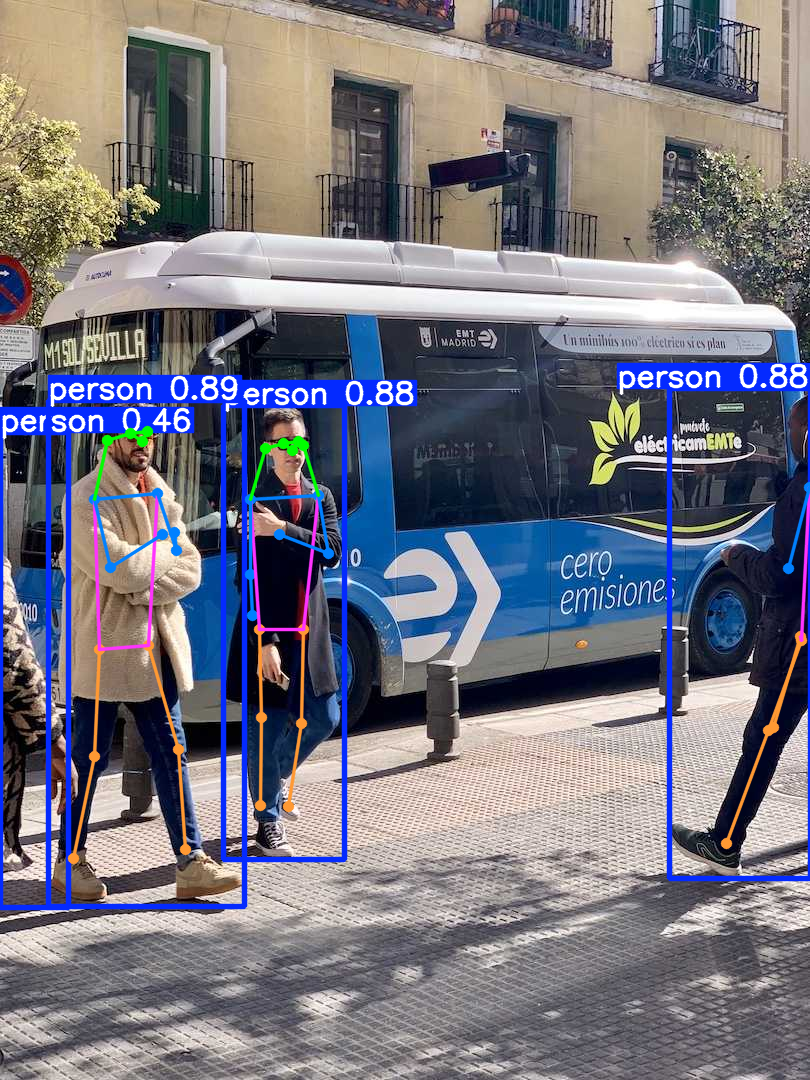

In [22]:
Image.fromarray(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))

In [52]:
class GetKeypoint(BaseModel):
    NOSE:           int = 0
    LEFT_EYE:       int = 1
    RIGHT_EYE:      int = 2
    LEFT_EAR:       int = 3
    RIGHT_EAR:      int = 4
    LEFT_SHOULDER:  int = 5
    RIGHT_SHOULDER: int = 6
    LEFT_ELBOW:     int = 7
    RIGHT_ELBOW:    int = 8
    LEFT_WRIST:     int = 9
    RIGHT_WRIST:    int = 10
    LEFT_HIP:       int = 11
    RIGHT_HIP:      int = 12
    LEFT_KNEE:      int = 13
    RIGHT_KNEE:     int = 14
    LEFT_ANKLE:     int = 15
    RIGHT_ANKLE:    int = 16

get_keypoint = GetKeypoint()

In [53]:
dataset_root = "dataset"
fall_notfall_list = os.listdir(dataset_root)
fall_notfall_list


['needhelp', 'fine']

In [54]:
def extract_keypoint(keypoint):
    # nose
    nose_x, nose_y = keypoint[get_keypoint.NOSE]
    # eye
    left_eye_x, left_eye_y = keypoint[get_keypoint.LEFT_EYE]
    right_eye_x, right_eye_y = keypoint[get_keypoint.RIGHT_EYE]
    # ear
    left_ear_x, left_ear_y = keypoint[get_keypoint.LEFT_EAR]
    right_ear_x, right_ear_y = keypoint[get_keypoint.RIGHT_EAR]
    # shoulder
    left_shoulder_x, left_shoulder_y = keypoint[get_keypoint.LEFT_SHOULDER]
    right_shoulder_x, right_shoulder_y = keypoint[get_keypoint.RIGHT_SHOULDER]
    # elbow
    left_elbow_x, left_elbow_y = keypoint[get_keypoint.LEFT_ELBOW]
    right_elbow_x, right_elbow_y = keypoint[get_keypoint.RIGHT_ELBOW]
    # wrist
    left_wrist_x, left_wrist_y = keypoint[get_keypoint.LEFT_WRIST]
    right_wrist_x, right_wrist_y = keypoint[get_keypoint.RIGHT_WRIST]
    # hip
    left_hip_x, left_hip_y = keypoint[get_keypoint.LEFT_HIP]
    right_hip_x, right_hip_y = keypoint[get_keypoint.RIGHT_HIP]
    # knee
    left_knee_x, left_knee_y = keypoint[get_keypoint.LEFT_KNEE]
    right_knee_x, right_knee_y = keypoint[get_keypoint.RIGHT_KNEE]
    # ankle
    left_ankle_x, left_ankle_y = keypoint[get_keypoint.LEFT_ANKLE]
    right_ankle_x, right_ankle_y = keypoint[get_keypoint.RIGHT_ANKLE]
    
    return [
        nose_x, nose_y,
        left_eye_x, left_eye_y,
        right_eye_x, right_eye_y,
        left_ear_x, left_ear_y,
        right_ear_x, right_ear_y,
        left_shoulder_x, left_shoulder_y,
        right_shoulder_x, right_shoulder_y,
        left_elbow_x, left_elbow_y,
        right_elbow_x, right_elbow_y,
        left_wrist_x, left_wrist_y,
        right_wrist_x, right_wrist_y,
        left_hip_x, left_hip_y,
        right_hip_x, right_hip_y,
        left_knee_x, left_knee_y,
        right_knee_x, right_knee_y,        
        left_ankle_x, left_ankle_y,
        right_ankle_x, right_ankle_y
    ]

In [59]:
import glob

fall_dataset_csv = []
for label in fall_notfall_list:
    
    image_path_list = glob.glob(f'{dataset_root}/{label}/*.[jJ][pP][gG]')
    for image_path in image_path_list:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            break
        image_name = image_path.split('/')[-1]
        image = cv2.imread(image_path)
        height, width = image.shape[:2]

        results = pose_model.predict(image, save=False)[0]
        results_keypoint = results.keypoints.xyn.cpu().numpy()
        for result_keypoint in results_keypoint:
            if len(result_keypoint) == 17:
                keypoint_list = extract_keypoint(result_keypoint)

                keypoint_list.insert(0, image_name)
                keypoint_list.insert(1, label)
                fall_dataset_csv.append(keypoint_list)


0: 640x640 1 person, 83.8ms
Speed: 3.6ms preprocess, 83.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 75.1ms
Speed: 1.7ms preprocess, 75.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 68.8ms
Speed: 2.3ms preprocess, 68.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 71.5ms
Speed: 2.1ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 67.0ms
Speed: 3.3ms preprocess, 67.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 65.6ms
Speed: 1.5ms preprocess, 65.6ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 59.8ms
Speed: 1.6ms preprocess, 59.8ms inference, 0.4ms postprocess per image at shape 

In [60]:
import csv
header = [
    'image_name',
    'label',
    # nose
    'nose_x',
    'nose_y',
    # left eye
    'left_eye_x',
    'left_eye_y',
    # right eye
    'right_eye_x',
    'right_eye_y',
    # left ear
    'left_ear_x',
    'left_ear_y',
    # right ear
    'right_ear_x',
    'right_ear_y',
    # left shoulder
    'left_shoulder_x',
    'left_shoulder_y',
    # right sholder
    'right_shoulder_x',
    'right_shoulder_y',
    # left elbow
    'left_elbow_x',
    'left_elbow_y',
    # rigth elbow
    'right_elbow_x',
    'right_elbow_y',
    # left wrist
    'left_wrist_x',
    'left_wrist_y',
    # right wrist
    'right_wrist_x',
    'right_wrist_y',
    # left hip
    'left_hip_x',
    'left_hip_y',
    # right hip
    'right_hip_x',
    'right_hip_y',
    # left knee
    'left_knee_x',
    'left_knee_y',
    # right knee
    'right_knee_x',
    'right_knee_y',
    # left ankle
    'left_ankle_x',
    'left_ankle_y',
    # right ankle
    'right_ankle_x',
    'right_ankle_y'
]

with open('fall_pose_keypoint_v2.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    writer.writerow(header)

    writer.writerows(fall_dataset_csv)


In [63]:

import pandas as pd

df = pd.read_csv('fall_pose_keypoint_v2.csv')
df = df.drop('image_name', axis=1)
df.head()

,label,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,needhelp,0.802498,0.561774,0.813926,0.562861,0.819918,0.544108,0.814199,0.565528,0.816912,...,0.518126,0.496779,0.384694,0.551551,0.379427,0.505839,0.234543,0.503823,0.221133,0.427620
1,needhelp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.049140,0.096838,0.036475,0.216825,0.056460,0.221321,0.051879,0.373114,0.061669,0.382340
2,needhelp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.236854,0.078964,0.199388,0.161084,0.247893,0.161160,0.164344,0.252980,0.273755,0.252240
3,needhelp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.981390,0.259671,0.982661,0.260302,0.947703,0.360081,0.953294,0.361626
4,needhelp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.797548,0.024245,0.820755,0.100652,0.795297,0.101185,0.804242,0.171119,0.787399,0.173734


In [64]:
df.shape

(455, 35)